In [ ]:
#Linear Models for Regression

In [1]:
#1. Problem formulation
#2. Collecting the data
#3. Exploraroty Data Analysis
#4. Data Processing
#5. Choosing and Training a model
#6. Evaluating a model
#7. Improving a model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression

In [3]:
# Loading the data

X, y = fetch_california_housing(return_X_y=True)

In [4]:
type(X)

numpy.ndarray

In [5]:
type(y)

numpy.ndarray

In [6]:
import urllib.request 

data_path = 'https://raw.githubusercontent.com/nyandwi/public_datasets/master/housing.csv'

def download_read_data(path):
    
    """
     Function to retrieve data from the data paths
     And to read the data as a pandas dataframe
  
    To return the dataframe
    """ 
    
      ## Only retrieve the directory of the data

    data_path =  urllib.request.urlretrieve(path)[0]
    data = pd.read_csv(path)
    
    return data

In [7]:
cal_data = download_read_data(data_path)

In [8]:
cal_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
cal_data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [ ]:
#Information about the features 

#1. longitude: A measure of how far west a house is; a higher value is farther west
#2. latitude: A measure of how far north a house is; a higher value is farther north
#3. housing_median_age: Median age of a house within a block; a lower number is a newer building
#4. total_rooms: Total number of rooms within a block
#5. total_bedrooms: Total number of bedrooms within a block
#6. population: Total number of people residing within a block
#7. households: Total number of households, a group of people residing within a home unit, for a block
#8. median_income: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
#9. median_house_value: Median house value for households within a block (measured in US Dollars)
#10. oceanProximity: Location of the house w.r.t ocean/sea

In [10]:
cal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
len(cal_data)

20640

In [12]:
len(cal_data.columns)

10

In [ ]:
#So, we have 20640 data points and 10 features. In those 10 features, 9 features are input features and the feature median_house_value is the target variable/label.

In [13]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(cal_data, test_size=0.1,random_state=20)

In [14]:
print('The size of training data is: {} \nThe size of testing data is: {}'.format(len(train_data), len(test_data)))

The size of training data is: 18576 
The size of testing data is: 2064


In [15]:
# Let's copy the training data to revert it in case we mess things up

cal_train = train_data.copy()

In [16]:
# By default, describe shows the stats of the numerical features. 
# include paramater gives us option to show all features 

train_data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
longitude,18576.0,NaN,NaN,NaN,-119.56753,2.000581,-124.35,-121.79,-118.49,-118.01,-114.49
latitude,18576.0,NaN,NaN,NaN,35.630217,2.13326,32.54,33.93,34.26,37.71,41.95
housing_median_age,18576.0,NaN,NaN,NaN,28.661068,12.604039,1.0,18.0,29.0,37.0,52.0
total_rooms,18576.0,NaN,NaN,NaN,2631.567453,2169.46745,2.0,1445.0,2127.0,3149.0,39320.0
total_bedrooms,18390.0,NaN,NaN,NaN,537.344698,417.672864,1.0,295.0,435.0,648.0,6445.0
population,18576.0,NaN,NaN,NaN,1422.408376,1105.486111,3.0,785.75,1166.0,1725.0,28566.0
households,18576.0,NaN,NaN,NaN,499.277078,379.473497,1.0,279.0,410.0,606.0,6082.0
median_income,18576.0,NaN,NaN,NaN,3.870053,1.900225,0.4999,2.5643,3.5341,4.742725,15.0001
median_house_value,18576.0,NaN,NaN,NaN,206881.011305,115237.605962,14999.0,120000.0,179800.0,264700.0,500001.0
ocean_proximity,18576,5,<1H OCEAN,8231,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
train_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        186
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [18]:
print('The Percentage of missing values in total_bedrooms is: {}%'.format(train_data.isnull().sum()['total_bedrooms'] / len(train_data) * 100))

The Percentage of missing values in total_bedrooms is: 1.0012919896640826%


In [19]:
train_data['ocean_proximity'].value_counts()

<1H OCEAN     8231
INLAND        5896
NEAR OCEAN    2384
NEAR BAY      2061
ISLAND           4
Name: ocean_proximity, dtype: int64

<AxesSubplot:xlabel='ocean_proximity', ylabel='count'>

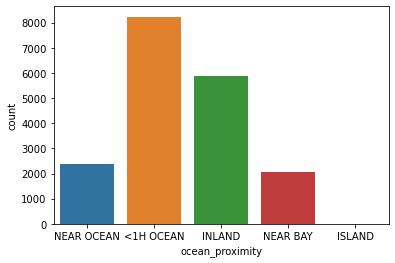

In [20]:
sns.countplot(data=train_data, x='ocean_proximity')

In [21]:
correlation = train_data.corr()
correlation['median_house_value']

longitude            -0.048622
latitude             -0.142543
housing_median_age    0.105237
total_rooms           0.133927
total_bedrooms        0.049672
population           -0.026109
households            0.065508
median_income         0.685433
median_house_value    1.000000
Name: median_house_value, dtype: float64

<AxesSubplot:>

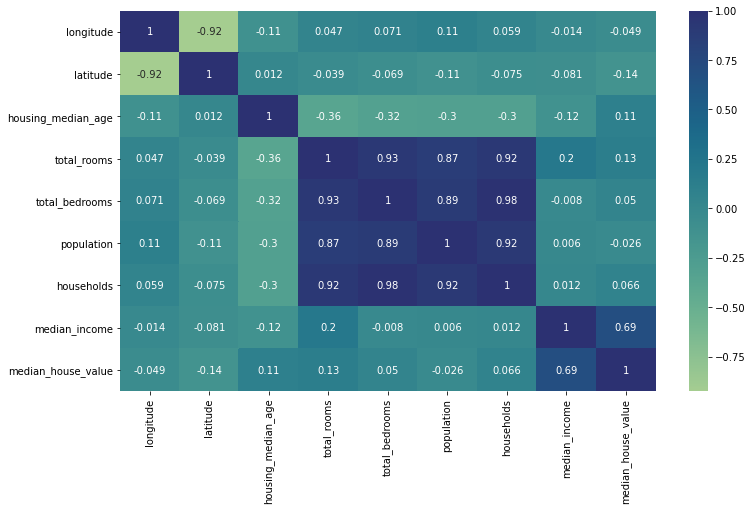

In [22]:
#### Visualizing correlation

plt.figure(figsize=(12,7))

sns.heatmap(correlation,annot=True,cmap='crest')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

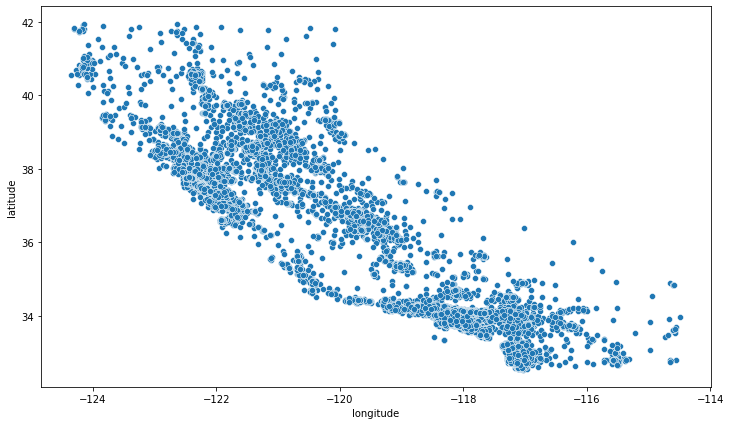

In [23]:
plt.figure(figsize=(12,7))

sns.scatterplot(data = train_data, x='longitude', y='latitude')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

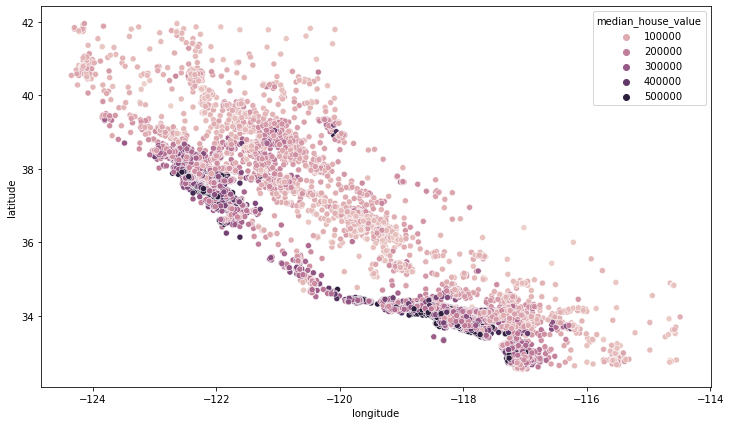

In [24]:
plt.figure(figsize=(12,7))

sns.scatterplot(data = train_data, x='longitude', y='latitude', hue='median_house_value')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

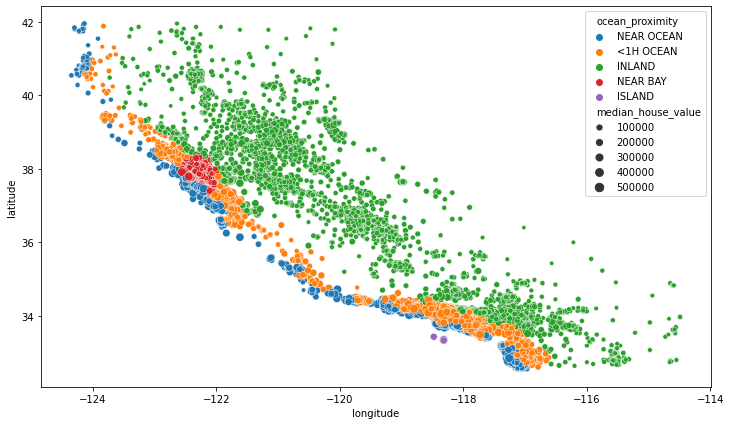

In [25]:
plt.figure(figsize=(12,7))

sns.scatterplot(data = train_data, x='longitude', y='latitude', hue='ocean_proximity', 
                size='median_house_value')

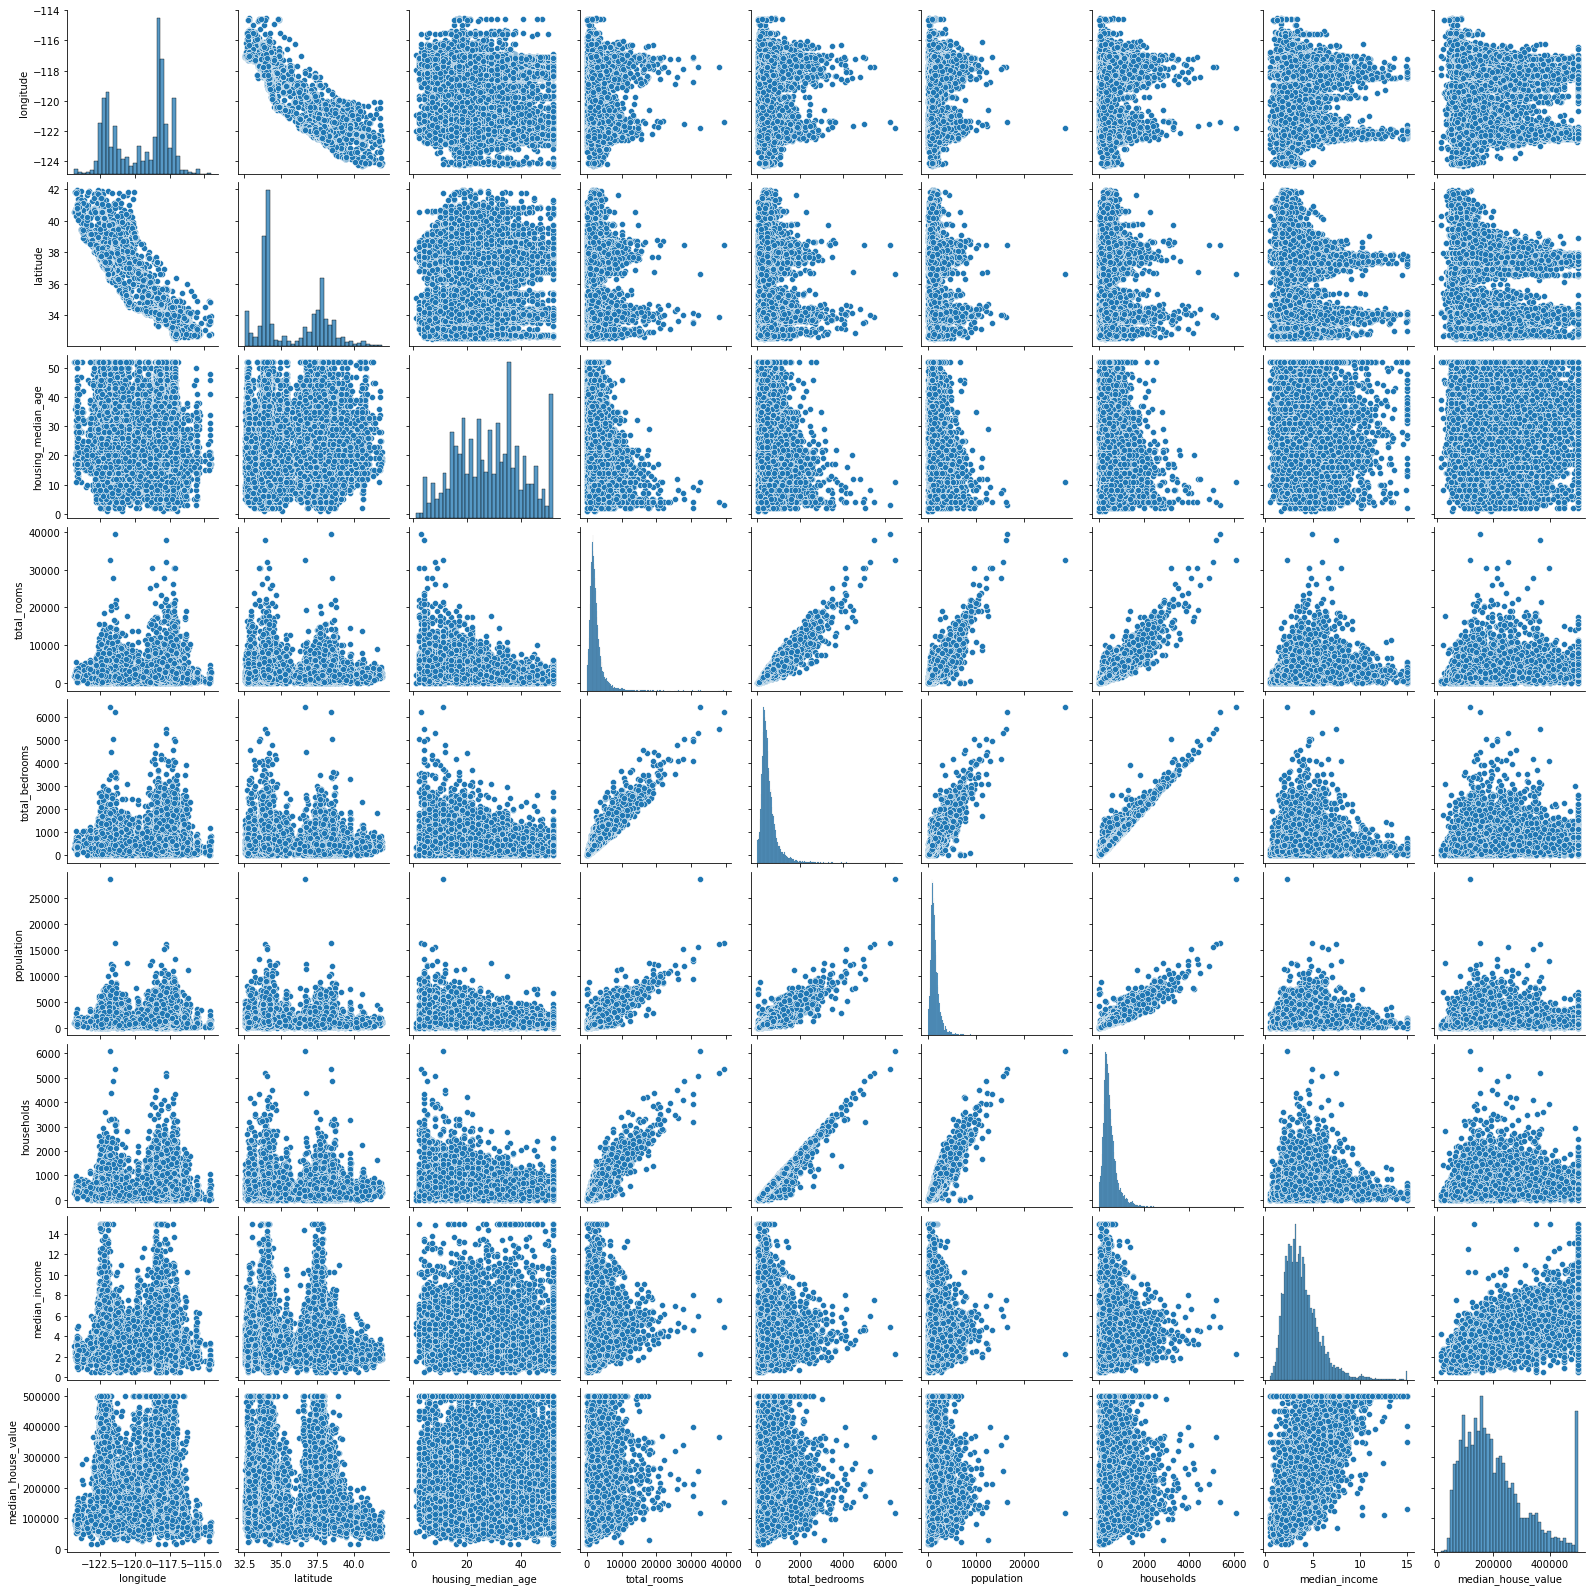

In [27]:
sns.pairplot(train_data)

In [ ]:
#In this part, it's where we prepare the data to be in proper format that will be accepted by the ML model. The processing functions that we apply to training set must also be applied to the test set.

#Here are three most things that we will take care of in our dataset:

#Missing values
#Encoding categorical features
#Scaling numerical features

In [28]:
training_input_data = train_data.drop('median_house_value', axis=1)
training_labels = train_data['median_house_value']

In [29]:
training_labels.head()

8101     150800.0
9757     114700.0
16837    273000.0
11742    193100.0
1871     173400.0
Name: median_house_value, dtype: float64

In [30]:
training_input_data.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
8101,-118.21,33.80,41.0,1251.0,279.0,1053.0,278.0,3.2778,NEAR OCEAN
9757,-121.44,36.51,31.0,1636.0,380.0,1468.0,339.0,3.2219,<1H OCEAN
16837,-122.48,37.59,29.0,5889.0,959.0,2784.0,923.0,5.3991,NEAR OCEAN


In [31]:
from sklearn.impute import SimpleImputer

# We are going to impute all numerical features
# Ideally, we would only impute bed_rooms because it's the one possessing NaNs

num_feats = training_input_data.drop('ocean_proximity', axis=1)

In [32]:
def handle_missing_values(input_data):
  """
  Docstring 

  # This is a function to take numerical features...
  ...and impute the missing values
  # We are filling missing values with mean
  # fit_transform fit the imputer on input data and transform it immediately
  # You can use fit(input_data) and then transform(input_data) or
  # Or do it at once with fit.transform(input_data)
  # Imputer returns the imputed data as a NumPy array 
  # We will convert it back to Pandas dataframe

  """
  mean_imputer = SimpleImputer(strategy='mean')
  num_feats_imputed = mean_imputer.fit_transform(input_data)
  num_feats_imputed = pd.DataFrame(num_feats_imputed, 
                            columns=input_data.columns, index=input_data.index )


  return num_feats_imputed

In [33]:
num_feats_imputed = handle_missing_values(num_feats)
num_feats_imputed.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [34]:
training_input_data['ocean_proximity'].value_counts()

<1H OCEAN     8231
INLAND        5896
NEAR OCEAN    2384
NEAR BAY      2061
ISLAND           4
Name: ocean_proximity, dtype: int64

In [35]:
cat_feats = training_input_data['ocean_proximity']
cat_feats.value_counts()

<1H OCEAN     8231
INLAND        5896
NEAR OCEAN    2384
NEAR BAY      2061
ISLAND           4
Name: ocean_proximity, dtype: int64

In [36]:
feat_map = {
      '<1H OCEAN': 0,
      'INLAND': 1,
      'NEAR OCEAN': 2,
      'NEAR BAY': 3, 
      'ISLAND': 4
}

cat_feats_encoded = cat_feats.map(feat_map)

In [37]:
cat_feats_encoded.head()

8101     2
9757     0
16837    2
11742    1
1871     1
Name: ocean_proximity, dtype: int64

In [47]:
from sklearn.preprocessing import OneHotEncoder

def one_hot(input_data):

  one_hot_encoder = OneHotEncoder()
  output = one_hot_encoder.fit_transform(input_data)
  
  # The output of one hot encoder is a sparse matrix. 
  # It's best to convert it into numpy array 
  output = output.toarray()

  return output

In [48]:
cat_feats = training_input_data[['ocean_proximity']]

cat_feats_hot = one_hot(cat_feats)

cat_feats_hot

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [ ]:
#Scaling Numerical features

In [38]:
## Normalizing numerical features 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_scaled = scaler.fit_transform(num_feats)
num_scaled

array([[0.62271805, 0.13390011, 0.78431373, ..., 0.03676084, 0.04555172,
        0.19157667],
       [0.29513185, 0.4218916 , 0.58823529, ..., 0.05129013, 0.05558296,
        0.18772155],
       [0.18965517, 0.53666312, 0.54901961, ..., 0.09736372, 0.1516198 ,
        0.3378712 ],
       ...,
       [0.74340771, 0.02763018, 0.58823529, ..., 0.03942163, 0.07383654,
        0.27298934],
       [0.61663286, 0.16578108, 0.78431373, ..., 0.04764906, 0.11609933,
        0.36398808],
       [0.19269777, 0.55791711, 0.88235294, ..., 0.02653783, 0.07432988,
        0.22199004]])

In [39]:
## Standardizing numerical features 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_scaled = scaler.fit_transform(num_feats)
num_scaled

array([[ 0.67858615, -0.85796668,  0.97899282, ..., -0.33416821,
        -0.58313172, -0.31168387],
       [-0.93598814,  0.41242353,  0.18557502, ...,  0.04124236,
        -0.42237836, -0.34110223],
       [-1.45585107,  0.9187045 ,  0.02689146, ...,  1.23170093,
         1.11663747,  0.80468775],
       ...,
       [ 1.27342931, -1.32674535,  0.18557502, ..., -0.26541833,
        -0.12985994,  0.30957512],
       [ 0.64859406, -0.71733307,  0.97899282, ..., -0.05283644,
         0.54741244,  1.00398532],
       [-1.44085502,  1.01246024,  1.37570172, ..., -0.59831252,
        -0.12195403, -0.07959982]])

In [42]:
#Putting All Data Preprocessing Steps Into A Single Pipeline*



In [43]:
from sklearn.pipeline import Pipeline

In [44]:
num_feats_pipe = Pipeline([
                  ('imputer', SimpleImputer(strategy='mean')), 
                  ('scaler', StandardScaler())         
            ])

num_feats_preprocessed = num_feats_pipe.fit_transform(num_feats)

In [45]:
num_feats_preprocessed

array([[ 0.67858615, -0.85796668,  0.97899282, ..., -0.33416821,
        -0.58313172, -0.31168387],
       [-0.93598814,  0.41242353,  0.18557502, ...,  0.04124236,
        -0.42237836, -0.34110223],
       [-1.45585107,  0.9187045 ,  0.02689146, ...,  1.23170093,
         1.11663747,  0.80468775],
       ...,
       [ 1.27342931, -1.32674535,  0.18557502, ..., -0.26541833,
        -0.12985994,  0.30957512],
       [ 0.64859406, -0.71733307,  0.97899282, ..., -0.05283644,
         0.54741244,  1.00398532],
       [-1.44085502,  1.01246024,  1.37570172, ..., -0.59831252,
        -0.12195403, -0.07959982]])

In [50]:
cat_feats_pipe = Pipeline([
     ('encoder', OneHotEncoder())                      
])

cat_feats_preprocessed = cat_feats_pipe.fit_transform(cat_feats)

In [51]:
type(cat_feats_preprocessed)

scipy.sparse.csr.csr_matrix

In [52]:
from sklearn.compose import ColumnTransformer

# The transformer requires lists of features

num_list = list(num_feats)
cat_list = list(cat_feats)

final_pipe = ColumnTransformer([
   ('num', num_feats_pipe, num_list),    
   ('cat', cat_feats_pipe, cat_list)                        

])

training_data_preprocessed = final_pipe.fit_transform(training_input_data)

In [53]:
training_data_preprocessed

array([[ 0.67858615, -0.85796668,  0.97899282, ...,  0.        ,
         0.        ,  1.        ],
       [-0.93598814,  0.41242353,  0.18557502, ...,  0.        ,
         0.        ,  0.        ],
       [-1.45585107,  0.9187045 ,  0.02689146, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.27342931, -1.32674535,  0.18557502, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.64859406, -0.71733307,  0.97899282, ...,  0.        ,
         0.        ,  0.        ],
       [-1.44085502,  1.01246024,  1.37570172, ...,  0.        ,
         1.        ,  0.        ]])

In [54]:
type(training_data_preprocessed)


numpy.ndarray

In [55]:
final_pipe = ColumnTransformer([
   ('num', num_feats_pipe, num_list),    
   ('cat', OneHotEncoder(), cat_list)                        

])

training_data_preprocessed = final_pipe.fit_transform(training_input_data)

In [ ]:
#Choosing and Training a model

In [56]:
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()

In [57]:
reg_model.fit(training_data_preprocessed, training_labels)

LinearRegression()

In [58]:
# Coef or coefficients are referred to as weights

reg_model.coef_

array([-55263.30927452, -56439.9137407 ,  13168.07604103,  -7925.04690235,
        27745.66496461, -50635.65732685,  35554.21578029,  72788.96303579,
       -22102.99609181, -60373.27017952, 127304.48624811, -26150.80577065,
       -18677.41420614])

In [59]:
# Intercept is what can be compared to the bias 

reg_model.intercept_

241108.2459100915

In [ ]:
#Model Evaluation

In [61]:
from sklearn.metrics import mean_squared_error

predictions = reg_model.predict(training_data_preprocessed)

In [62]:
mse = mean_squared_error(training_labels, predictions)

rmse = np.sqrt(mse)
rmse 

68438.90385283883

In [63]:
train_data.describe().median_house_value['mean']

206881.01130490957

In [ ]:
#Model evaluation with cross validation

In [64]:
from sklearn.model_selection import cross_val_score

scoring = 'neg_root_mean_squared_error' 

scores = cross_val_score(reg_model, training_data_preprocessed, training_labels, scoring=scoring, cv=10)

In [65]:
# You can use `metrics.SCORERS.keys()` to display the metrics scoring that you can use. 

#from sklearn import metrics

#metrics.SCORERS.keys()

In [66]:
scores = -scores

scores.mean()

68491.40480256345

In [67]:
from sklearn.model_selection import cross_val_predict

predictions = cross_val_predict(reg_model, training_data_preprocessed, training_labels, cv=10)

In [68]:
mse_cross_val = mean_squared_error(training_labels, predictions)
rmse_cross_val = np.sqrt(mse_cross_val)
rmse_cross_val 

68537.09704554168

In [69]:
test_input_data = test_data.drop('median_house_value', axis=1)
test_labels = test_data['median_house_value']


test_preprocessed = final_pipe.transform(test_input_data)

In [70]:
test_pred = reg_model.predict(test_preprocessed)
test_mse = mean_squared_error(test_labels,test_pred)

test_rmse = np.sqrt(test_mse)
test_rmse

71714.55718082144